# Transformada $z$ y respuesta temporal

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd

Se tiene un sistema de tiempo discreto cuyo modelo es:

$$y[k] = x[k] + \frac{1}{2}y[k-1]$$

Suponga que el sistema se excita por un impulso $\delta[k]$. Utilizando la ecuación en diferencias se nota que el sistema es IIR.

\begin{align}
y[k] &= \delta [k] + \frac{1}{2}y[k-1] \\
y[k<0] &= 0 + \frac{1}{2}0 \\
y[0] &= 1 + \frac{1}{2}0 \\
y[1] &= 0 + \frac{1}{2}  \\
y[2] &= 0 + \frac{1}{2} \frac{1}{2}  \\
y[3] &= 0 + \frac{1}{2} \frac{1}{2} \frac{1}{2}  \\
y[k] &= \left( \frac{1}{2}  \right)^k \\
\end{align}

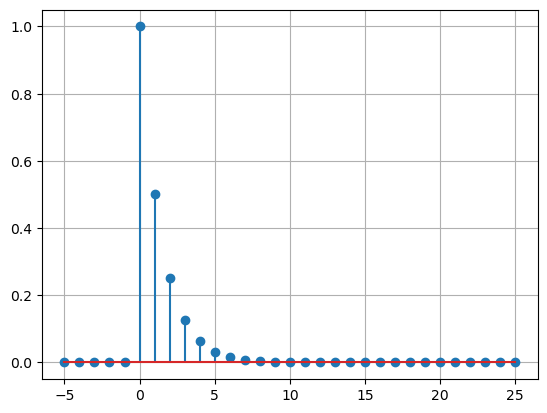

In [10]:
K = np.linspace(-5,25,31)
impulso = np.where(K==0,1,0)
y = [0]
for x in impulso:
    y.append(x+0.5*y[-1])

plt.stem(K,y[1:])
plt.grid()

In [11]:
df = pd.DataFrame(data = {'k':K,
                          'x':impulso,
                          'y':y[1:]})
df

,k,x,y
0,-5.0,0,0.000000e+00
1,-4.0,0,0.000000e+00
2,-3.0,0,0.000000e+00
3,-2.0,0,0.000000e+00
4,-1.0,0,0.000000e+00
5,0.0,1,1.000000e+00
6,1.0,0,5.000000e-01
7,2.0,0,2.500000e-01
8,3.0,0,1.250000e-01
9,4.0,0,6.250000e-02


In [12]:

k = sym.symbols('k', integer=True)
y = sym.Function('y')(k)
x = sym.Function('x')(k)

# Definir la ecuación en diferencia 
modelo = y - 0.5 * y.subs(k, k-1) - x 

# Se encuentra la solución homogenea
sol = sym.rsolve(modelo.subs(x,0), y)
sol

0.5**k*C0

Como el impulso unitario aparece en el intante $k=0$, es fácil constatar que la solución en $k=0$ debe ser igual a $1$, por lo que $C_0=1$

Aplicando la transformada $z$ al modelo, se tiene:
$$y[k] = x[k] + \frac{1}{2}y[k-1]$$
$$Y(z) = X(z) + \frac{1}{2}Y(z)z^{-1}$$

Este modelo está ahora en el dominio de las frecuencias. Puede operarse para encontrar la función de transferencia del sistema.

Se resta $\frac{1}{2}Y(z)z^{-1}$ a ambos lados de la ecuación.

$$Y(z)- \frac{1}{2}Y(z)z^{-1} = X(z) + \frac{1}{2}Y(z)z^{-1} - \frac{1}{2}Y(z)z^{-1}$$

$$Y(z)- \frac{1}{2}Y(z)z^{-1} = X(z)$$

Se pone $Y(z)$ como factor común.

$$Y(z)\left( 1 - \frac{1}{2}z^{-1} \right) = X(z)$$

Se divide por $X(z)\left( 1 - \frac{1}{2}z^{-1} \right)$ a ambos lados de la ecuación.
$$Y(z)\left(1 - \frac{1}{2}z^{-1}\right)\frac{1}{ X(z)\left( 1 - \frac{1}{2}z^{-1}\right)} = X(z)\frac{1}{ X(z)\left( 1 - \frac{1}{2}z^{-1}\right)}$$

Se obtiene la función de transferencia.

$$\frac{Y(z)}{X(z)} = \frac{1}{1 - \frac{1}{2}z^{-1}}$$
$$\frac{Y(z)}{X(z)}=\frac{1}{1 - \frac{1}{2}z^{-1}} \cdot \frac{z}{z} = \frac{z}{z - \frac{1}{2}}$$

Con anterioridad se había obtenido que:

$$\mathcal{Z} \{ \epsilon[k] \cdot z_0^k \} = \frac{z}{z - z_0} \qquad \text{for } |z| > |z_0|$$

Observe que tiene la misma forma que la función de transferencia encontrada. Esto indica que la respuesta impulsional del sistema es $\epsilon[k] \cdot z_0^k $ con $z_0 = \frac{1}{2}$.

In [13]:
import control

In [45]:
G = control.tf([1,0],[1,-0.5],1)
G

TransferFunction(array([1, 0]), array([ 1. , -0.5]), 1)

- El sistema tiene 1 polo.
$$z-\frac{1}{2}=0$$
$$z = \frac{1}{2}$$

In [46]:
G.pole()

array([0.5+0.j])

- El sistema tiene 1 cero.
$$z = 0$$

In [47]:
G.zero()

array([0.+0.j])

Con la ubicación de las raíces, se puede generar el mapa de polos y ceros en $z$.

(array([0.5+0.j]), array([0.+0.j]))

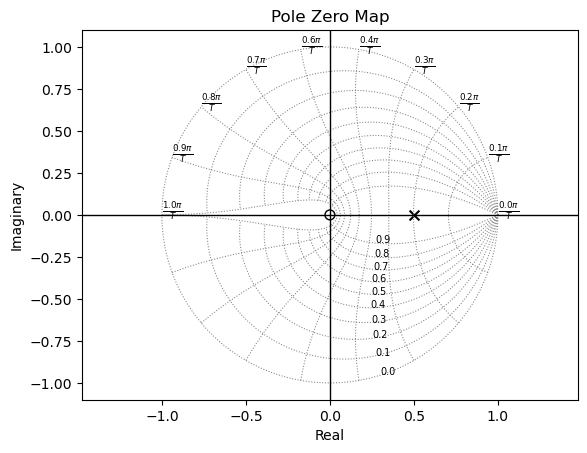

In [48]:
control.pzmap(G, plot=True, grid=True)

- ¿Qué podría decir de la estabilidad del sistema?
- ¿Del amortiguamiento?

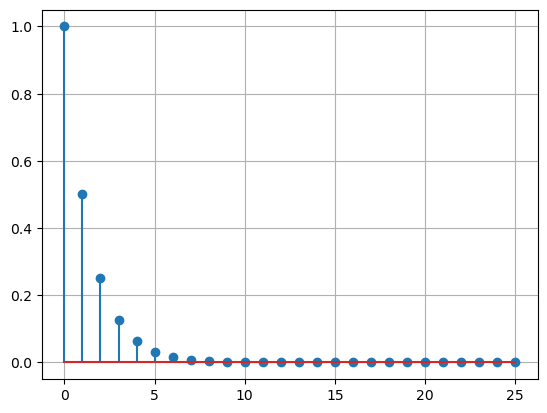

In [49]:
tc,yc = control.impulse_response(G);
plt.stem(tc,yc)
plt.grid()

$$G(z) = \frac{Y(z)}{X(z)}=\frac{z}{z+0.5}$$

$$\frac{Y(z)}{X(z)}=\frac{z}{z+0.5}$$

$$\frac{Y(z)}{X(z)}X(z)=\frac{z}{z+0.5}X(z)$$

$$Y(z)=\frac{z}{z+0.5}X(z)$$

$$Y(z)(z+0.5)=\frac{z}{z+0.5}(z+0.5)X(z)$$

$$Y(z)(z+0.5)=zX(z)$$

$$Y(z)z+Y(z)0.5=zX(z)$$

$$y[k+1]+0.5y[k]=x[k+1]$$

$$y[k]+0.5y[k-1]=x[k]$$

$$y[k]=x[k]-0.5y[k-1]$$